<a href="https://colab.research.google.com/github/famodcoder/LinearReg/blob/main/linearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from sklearn.utils import shuffle
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing(as_frame=True).frame
df = shuffle(df, random_state=0)
df = df.head(1000)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05,1.369
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97,2.413
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84,2.007
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60,0.725
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43,4.600


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df.drop(['MedHouseVal'], axis=1)
y = df['MedHouseVal']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5863264047398479

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=1)

model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.6255168893408665

In [6]:
import pandas as pd
df = pd.read_csv('Data/taxi-fares.csv', parse_dates=['pickup_datetime'])
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2014-06-15 17:11:00.000000107,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247,1
1,2011-03-14 22:43:00.00000095,4.9,2011-03-14 22:43:00+00:00,-73.993552,40.731110,-73.998497,40.737200,5
2,2011-02-14 15:14:00.00000067,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328,1
3,2009-10-29 11:29:00.00000040,6.9,2009-10-29 11:29:00+00:00,-73.973703,40.763542,-73.984253,40.758603,5
4,2011-07-02 10:38:00.00000028,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162,1


<Axes: xlabel='passenger_count', ylabel='count'>

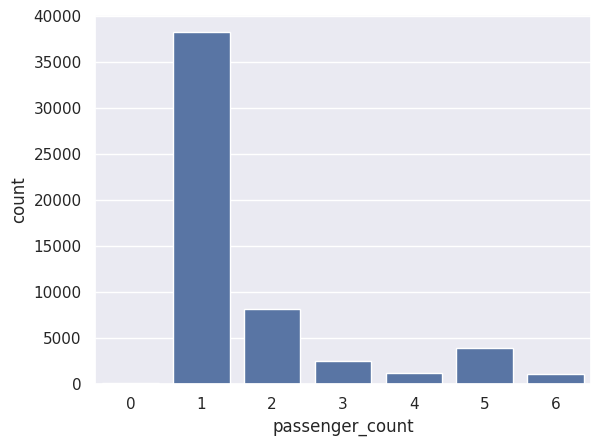

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.countplot(x=df['passenger_count'])

In [8]:
df = df[df['passenger_count'] == 1]
df = df.drop(['key', 'passenger_count'], axis=1)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247
2,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328
4,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162
5,15.3,2011-12-09 20:03:00+00:00,-73.973500,40.792610,-73.936035,40.856548
8,7.7,2011-04-02 01:05:15+00:00,-73.979564,40.735405,-73.955686,40.768065


In [9]:
df.shape

(38233, 6)

In [10]:
from math import sqrt

for i, row in df.iterrows():
    dt = row['pickup_datetime']
    df.at[i, 'day_of_week'] = dt.weekday()
    df.at[i, 'pickup_time'] = dt.hour
    x = (row['dropoff_longitude'] - row['pickup_longitude']) * 54.6
    y = (row['dropoff_latitude'] - row['pickup_latitude']) * 69.0
    distance = sqrt(x**2 + y**2)
    df.at[i, 'distance'] = distance

df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,day_of_week,pickup_time,distance
0,7.0,2014-06-15 17:11:00+00:00,-73.995420,40.759662,-73.987607,40.751247,6.0,17.0,0.720497
2,6.1,2011-02-14 15:14:00+00:00,-73.972380,40.749527,-73.990638,40.745328,0.0,15.0,1.038136
4,10.5,2011-07-02 10:38:00+00:00,-73.921262,40.743615,-73.967383,40.765162,5.0,10.0,2.924341
5,15.3,2011-12-09 20:03:00+00:00,-73.973500,40.792610,-73.936035,40.856548,4.0,20.0,4.862893
8,7.7,2011-04-02 01:05:15+00:00,-73.979564,40.735405,-73.955686,40.768065,5.0,1.0,2.603493


In [11]:
df.drop(columns=['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
                 'dropoff_longitude', 'dropoff_latitude'], inplace=True)
df.head()

,fare_amount,day_of_week,pickup_time,distance
0,7.0,6.0,17.0,0.720497
2,6.1,0.0,15.0,1.038136
4,10.5,5.0,10.0,2.924341
5,15.3,4.0,20.0,4.862893
8,7.7,5.0,1.0,2.603493


In [12]:
 corr_matrix = df.corr()
corr_matrix['fare_amount'].sort_values(ascending=False)

,fare_amount
fare_amount,1.000000
distance,0.045873
day_of_week,0.009196
pickup_time,-0.019722


In [13]:
df.describe()

,fare_amount,day_of_week,pickup_time,distance
count,38233.000000,38233.000000,38233.000000,38233.000000
mean,11.214115,2.951534,13.387989,12.018397
std,9.703149,1.932809,6.446519,217.357022
min,-22.100000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,9.000000,0.762116
50%,8.500000,3.000000,14.000000,1.331326
75%,12.500000,5.000000,19.000000,2.402226
max,256.000000,6.000000,23.000000,4923.837280


In [14]:
df = df[(df['distance'] > 1.0) & (df['distance'] < 10.0)]
df = df[(df['fare_amount'] > 0.0) & (df['fare_amount'] < 50.0)]

In [15]:
 from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
x = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']
model = LinearRegression()
cross_val_score(model, x, y, cv=5).mean()

np.float64(0.7258845061910318)

In [16]:
 from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0)
cross_val_score(model, x, y, cv=5).mean()

np.float64(0.7061562792842154)

In [17]:
 from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0)
cross_val_score(model, x, y, cv=5).mean()

np.float64(0.750496262408626)

In [18]:
model.fit(x, y)

GradientBoostingRegressor(random_state=0)

In [19]:
model.predict(pd.DataFrame({ 'day_of_week': [5], 'pickup_time': [17],
                             'distance': [2.0] }))

array([10.95309995])

In [21]:
model.predict(pd.DataFrame({ 'day_of_week': [6], 'pickup_time': [17],
                             'distance': [2.0] }))

array([10.68884924])